In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
crypto_index=['defi']
components=['defi','1inch','aave','algo','alpha','bake','bal',
            'band','bel','comp','crv','flm','kava','knc','link',
            'lrc','mkr','ren','rsr','rune','sfp','snx','spell',
            'sxp','trb','unfi','uni','yfi','zrx']
benchmark=['btc']
df1=pd.read_csv('btc.csv')
df1['open_time']=pd.to_datetime(df1.open_time,unit='ms')
df=pd.DataFrame()
df['time']=df1['open_time']
for c in components:
    abc=pd.read_csv(f'{c}.csv')
    df[c]=abc['close']
df.set_index(df['time'],inplace=True)
del df['time']

In [28]:
df

,defi,1inch,aave,algo,alpha,bake,bal,band,bel,comp,...,rune,sfp,snx,spell,sxp,trb,unfi,uni,yfi,zrx
time,,,,,,,,,,,,,,,,,,,,,
2023-02-01 00:00:00,621.9,0.5099,82.73,0.2395,0.13450,0.1951,6.648,2.1276,0.5530,51.79,...,1.764,0.5697,2.286,0.000794,0.2808,15.48,5.588,6.541,7193.0,0.2159
2023-02-01 00:30:00,627.7,0.5119,83.14,0.2406,0.13505,0.1980,6.684,2.1344,0.5562,52.13,...,1.769,0.6683,2.299,0.000799,0.2845,15.65,5.623,6.561,7241.0,0.2171
2023-02-01 01:00:00,625.6,0.5097,82.65,0.2396,0.13433,0.1966,6.675,2.1014,0.5534,52.08,...,1.763,0.6844,2.282,0.000797,0.2844,15.65,5.588,6.554,7228.0,0.2168
2023-02-01 01:30:00,630.3,0.5109,83.23,0.2405,0.13504,0.1984,6.699,2.1464,0.5579,52.48,...,1.777,0.6928,2.305,0.000802,0.2850,15.76,5.627,6.601,7254.0,0.2185
2023-02-01 02:00:00,629.9,0.5109,82.97,0.2396,0.13457,0.1983,6.676,2.1467,0.5563,52.34,...,1.775,0.7137,2.307,0.000801,0.2861,15.85,5.614,6.573,7249.0,0.2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 21:30:00,648.3,0.5677,77.14,0.2435,0.13384,0.2319,7.106,1.9417,0.7631,48.65,...,1.570,0.4963,2.834,0.000812,0.3117,17.66,5.854,6.416,9059.0,0.2552
2023-02-28 22:00:00,652.3,0.5704,77.59,0.2445,0.13475,0.2320,7.140,1.9685,0.7672,48.81,...,1.574,0.4997,2.824,0.000816,0.3136,17.60,5.858,6.448,9214.0,0.2562
2023-02-28 22:30:00,652.9,0.5714,77.76,0.2450,0.13461,0.2322,7.124,1.9708,0.7704,49.02,...,1.576,0.5004,2.816,0.000815,0.3136,17.54,5.871,6.469,9224.0,0.2563


In [29]:
returns = df.pct_change().dropna()
returns

,defi,1inch,aave,algo,alpha,bake,bal,band,bel,comp,...,rune,sfp,snx,spell,sxp,trb,unfi,uni,yfi,zrx
time,,,,,,,,,,,,,,,,,,,,,
2023-02-01 00:30:00,0.009326,0.003922,0.004956,0.004593,0.004089,0.014864,0.005415,0.003196,0.005787,0.006565,...,0.002834,0.173074,0.005687,0.006804,0.013177,0.010982,0.006263,0.003058,0.006673,0.005558
2023-02-01 01:00:00,-0.003346,-0.004298,-0.005894,-0.004156,-0.005331,-0.007071,-0.001346,-0.015461,-0.005034,-0.000959,...,-0.003392,0.024091,-0.007395,-0.002503,-0.000351,0.000000,-0.006224,-0.001067,-0.001795,-0.001382
2023-02-01 01:30:00,0.007513,0.002354,0.007018,0.003756,0.005285,0.009156,0.003596,0.021414,0.008132,0.007680,...,0.007941,0.012274,0.010079,0.005520,0.002110,0.007029,0.006979,0.007171,0.003597,0.007841
2023-02-01 02:00:00,-0.000635,0.000000,-0.003124,-0.003742,-0.003480,-0.000504,-0.003433,0.000140,-0.002868,-0.002668,...,-0.001125,0.030167,0.000868,-0.000499,0.003860,0.005711,-0.002310,-0.004242,-0.000689,-0.002746
2023-02-01 02:30:00,0.003175,-0.001762,0.002652,0.001252,0.007803,0.010590,0.004044,-0.004705,0.001618,0.004585,...,0.001127,0.000701,0.002167,0.001123,0.002796,0.004416,0.005878,0.006846,0.002759,0.000459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 21:30:00,-0.005370,-0.008904,-0.008356,-0.007742,-0.001418,-0.007277,-0.000844,-0.004001,-0.005733,-0.002665,...,-0.006329,-0.006008,0.004608,-0.009882,-0.008588,0.002270,-0.003405,-0.010029,-0.008862,-0.010853
2023-02-28 22:00:00,0.006170,0.004756,0.005834,0.004107,0.006799,0.000431,0.004785,0.013802,0.005373,0.003289,...,0.002548,0.006851,-0.003529,0.005791,0.006096,-0.003398,0.000683,0.004988,0.017110,0.003918
2023-02-28 22:30:00,0.000920,0.001753,0.002191,0.002045,-0.001039,0.000862,-0.002241,0.001168,0.004171,0.004302,...,0.001271,0.001401,-0.002833,-0.001225,0.000000,-0.003409,0.002219,0.003257,0.001085,0.000390


In [30]:
a_comp=['1inch','aave','algo','alpha','bake','bal',
        'band','bel','comp','crv','flm','kava','knc','link',
        'lrc','mkr','ren','rsr','rune','sfp','snx','spell',
        'sxp','trb','unfi','uni','yfi','zrx']
s_scores = pd.DataFrame(index=returns.index[59:], columns=a_comp)
betas = pd.DataFrame(index=returns.index[59:], columns=a_comp)

In [31]:
for t in returns.index[59:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-60:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=a_comp, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in tmp_ret.columns.drop(crypto_index):
        X = tmp_ret[crypto_index].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']

C:\Users\Siddharth Kumar\AppData\Local\Temp\ipykernel_3088\2775813128.py:30: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
C:\Users\Siddharth Kumar\AppData\Local\Temp\ipykernel_3088\2775813128.py:30: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
C:\Users\Siddharth Kumar\AppData\Local\Temp\ipykernel_3088\2775813128.py:30: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))


In [32]:
s_scores

,1inch,aave,algo,alpha,bake,bal,band,bel,comp,crv,...,rune,sfp,snx,spell,sxp,trb,unfi,uni,yfi,zrx
time,,,,,,,,,,,,,,,,,,,,,
2023-02-02 06:00:00,0.602191,0.709628,0.027909,0.488141,-1.346117,-0.50435,0.075902,-0.10246,-1.308295,-0.648036,...,0.217192,NaN,0.110287,-1.028604,0.223214,-0.738413,0.047796,-0.992772,-0.440212,0.110482
2023-02-02 06:30:00,1.212088,0.776781,0.152579,1.041667,-1.231496,-0.328079,-0.346627,-0.052251,-1.090677,-0.874147,...,-0.080898,0.458,-0.328303,-0.880808,0.550604,-0.545778,-0.146001,-0.845679,-0.072934,0.376203
2023-02-02 07:00:00,1.856411,0.555796,-0.29485,0.76386,-1.394137,-0.460202,-0.736665,-0.191014,-0.985729,-1.046168,...,-0.432075,0.847311,-0.37961,-0.712634,0.714284,0.232895,-0.714014,-1.323475,-0.423261,0.325212
2023-02-02 07:30:00,1.479536,0.297891,-0.435405,0.716003,-1.208548,-0.097568,-0.251634,0.071154,-1.309222,-1.729354,...,0.11705,1.339188,-0.16961,-0.774803,0.601268,0.315727,-1.021363,-1.944468,-1.085149,0.26505
2023-02-02 08:00:00,1.292293,-0.570233,-0.515963,0.69853,-0.93359,-0.565632,-0.337669,-0.102765,-1.604113,-1.973677,...,0.399053,1.711401,-0.423476,-0.588845,0.61157,0.594164,-0.945785,-1.289092,-0.64741,0.16941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 21:30:00,-0.07121,0.93283,-0.136584,1.478321,-0.707826,1.018149,-0.260771,-0.239592,1.48936,-0.462305,...,-0.883903,-1.137824,-0.752031,-0.749777,-2.305973,1.253603,0.135481,-0.001338,0.736169,-0.892189
2023-02-28 22:00:00,-0.080303,1.049659,-0.040083,1.628549,-1.163681,1.036958,0.076857,-0.006244,1.592407,-0.410534,...,-1.200489,-0.840792,-1.335143,-1.212968,-1.960804,0.683568,-0.384253,0.124224,1.496454,-0.909292
2023-02-28 22:30:00,-0.222697,1.068799,0.01359,1.54963,-1.119958,0.736341,-0.246609,-0.364449,1.982228,-0.33633,...,-0.79437,-0.71813,-1.592295,-0.554579,-1.780837,0.388699,-0.409854,0.315318,1.066953,-0.968366


<AxesSubplot:xlabel='time'>

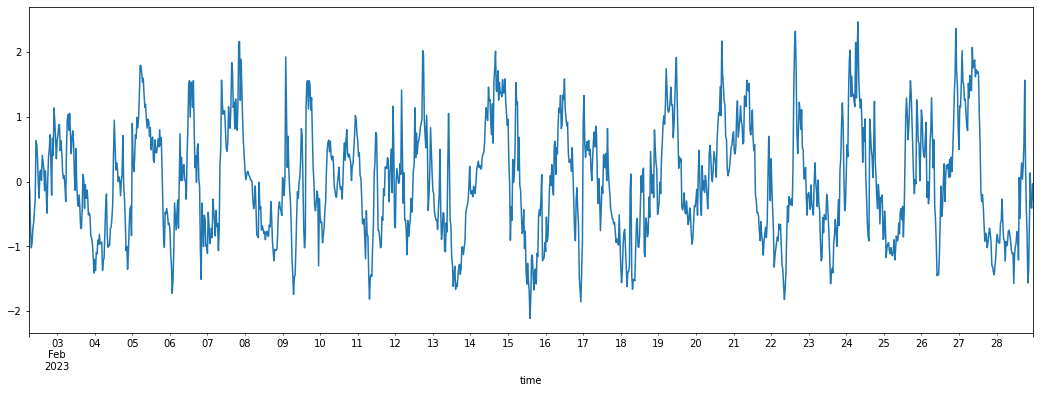

In [34]:
s_scores['unfi'].plot(figsize=(18,6))

In [35]:
betas

,1inch,aave,algo,alpha,bake,bal,band,bel,comp,crv,...,rune,sfp,snx,spell,sxp,trb,unfi,uni,yfi,zrx
time,,,,,,,,,,,,,,,,,,,,,
2023-02-02 06:00:00,[0.8955392273583798],[0.8757492770698933],[0.9057831953142297],[0.8426588755393561],[0.8296730241416574],[0.8819506866600575],[0.5969010698683652],[0.851681984658158],[0.8388823585075627],[0.8674049280686307],...,[0.9424127622403562],[0.327108279662643],[0.6943642125069465],[0.888315604859654],[0.8933549827471191],[0.7061448607904084],[0.8708565151571949],[0.9346034702911966],[0.8934611344127156],[0.9152879075290435]
2023-02-02 06:30:00,[0.8937877350827352],[0.8789189438405267],[0.9067178858528184],[0.8377122778365667],[0.8253334891143359],[0.8813513456469353],[0.59476619733432],[0.8532767452716116],[0.8335143860742787],[0.8740326703970803],...,[0.9476471374820019],[0.3736078441669273],[0.680487499467998],[0.8864928214866511],[0.8904701270897509],[0.7006658417972921],[0.8731948980596054],[0.9400147879712988],[0.8915974136319269],[0.9143519466251647]
2023-02-02 07:00:00,[0.8890401012280427],[0.8781172800342609],[0.9033253292894337],[0.8360174284626487],[0.8230065229495129],[0.8805464271412543],[0.5843128673808398],[0.8522491954983397],[0.8335069286980334],[0.8711383286722397],...,[0.9462591564988798],[0.40756646796030527],[0.6778845320069536],[0.8862284797396472],[0.8918382270343389],[0.6923212837139924],[0.8681743300885755],[0.93685395078401],[0.8892575025434134],[0.91399347479614]
2023-02-02 07:30:00,[0.8874065459553255],[0.8797660060717537],[0.9024847337871731],[0.8328631359225246],[0.8190829026213153],[0.8647704090828603],[0.5702970109433475],[0.8477108948939923],[0.8359622533007539],[0.8316925483297871],...,[0.9428320361580809],[0.3969801004021371],[0.661680588645268],[0.8863605232875866],[0.894262992176483],[0.6893690308642327],[0.8705180879229908],[0.9377057239616318],[0.8936453950479936],[0.9133244798578036]
2023-02-02 08:00:00,[0.8877891606374565],[0.8601670169141583],[0.904164678565156],[0.8339800783040091],[0.8202726299545493],[0.864262059797968],[0.5705586503712049],[0.8483898497651233],[0.8346982767211307],[0.8288504917809162],...,[0.9413399193526466],[0.4316694129172686],[0.6497495576397475],[0.886958037487393],[0.8951807944237878],[0.6941787072566075],[0.8712133137764227],[0.9385088820840005],[0.8929442943180069],[0.9141212992773634]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 21:30:00,[0.9096187158818628],[0.8844299794954724],[0.9350343000795465],[0.8535932624863913],[0.8032778942599851],[0.5690542325448203],[0.8584594393501982],[0.8517650332178434],[0.8800781571278342],[0.7831408709091489],...,[0.8934237494074996],[0.8216541931638053],[0.6198650028687182],[0.6842329477500536],[0.9152283857578721],[0.6349045899667204],[0.8650991134441935],[0.8440731787330558],[0.6860601587991586],[0.8314218273973778]
2023-02-28 22:00:00,[0.9083782429217336],[0.8836251091769821],[0.9349803654313888],[0.8533831377219974],[0.7862685246857752],[0.5653448416932745],[0.8538080077997947],[0.8542171104161038],[0.8767011988602493],[0.7894814552728209],...,[0.8869823240210666],[0.8236790007150618],[0.5904623620994794],[0.675302147145029],[0.9167354177211687],[0.6008340801496264],[0.8522800502647326],[0.8416576609352033],[0.6901556440404674],[0.8284448634907446]
2023-02-28 22:30:00,[0.9086497437695947],[0.8830563301319879],[0.9341628089888269],[0.8523589775705712],[0.7866271182697597],[0.5619019198890972],[0.8555253267426095],[0.8578299728565155],[0.8738845711393434],[0.7884409870090034],...,[0.8900773033683262],[0.8243162509329514],[0.5881203080408739],[0.6852900000620982],[0.9167399006830697],[0.5986453244187874],[0.8524793077831704],[0.84352971152198],[0.693181918909317],[0.8284944648864268]


In [36]:
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=a_comp)

for s in a_comp:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = 1 # open long
            pos = 1
        elif score<0.75 and pos==-1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-0.5 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions

In [37]:
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=a_comp)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp

In [40]:
# calculate positions in ETFs
algo_weights['defi'] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

In [41]:
algo_weights

,1inch,aave,algo,alpha,bake,bal,band,bel,comp,crv,...,sfp,snx,spell,sxp,trb,unfi,uni,yfi,zrx,defi
time,,,,,,,,,,,,,,,,,,,,,
2023-02-02 06:30:00,0,0,0,0,0.5,0,0,0,0.5,0,...,0,0,0,0,0,0,0,0,0,-0.829424
2023-02-02 07:00:00,-0.5,0,0,0,0.333333,0,0,0,0.333333,0,...,0,0,0,0,0,0,0.333333,0,0,-0.117138
2023-02-02 07:30:00,-0.333333,0,0,0,0.2,0,0,0,0.2,0.2,...,-0.333333,0,0,0,0,0,0.2,0,0,-0.245503
2023-02-02 08:00:00,-0.333333,0,0,0,0.2,0,0,0,0.2,0.2,...,-0.333333,0,0,0,0,0,0.2,0,0,-0.236660
2023-02-02 08:30:00,0,0,0,-0.333333,0.2,0,0,0,0.2,0.2,...,-0.333333,0,0,0,0,0,0.2,0,0,-0.256013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 21:30:00,0,-0.142857,0,-0.142857,0,-0.142857,0,0,-0.142857,0,...,0.2,0.2,0,0.2,-0.142857,0,0,0,0,-0.031075
2023-02-28 22:00:00,0,-0.125,0,-0.125,0,-0.125,0,0,-0.125,0,...,0.2,0.2,0,0.2,0,0,0,-0.125,0,-0.046588
2023-02-28 22:30:00,0,-0.142857,0,-0.142857,0,0,0,0,-0.142857,0,...,0.2,0.2,0,0.2,0,0,0,-0.142857,0,-0.027826


In [42]:
# calculate returns
ret = (returns.iloc[60:] * algo_weights.shift()).sum(axis=1) / (abs(algo_weights.shift()).sum(axis=1)/2)
cumret = np.nancumprod(ret+1)

In [44]:
# calculate returns of SPY and BBH for comparison
btc = pd.read_csv('btc.csv')
btc_returns = btc['close'].pct_change()
btc_cumret = np.nancumprod(btc_returns.iloc[60:]+1)
defi_cumret = np.nancumprod(returns.iloc[60:]['defi']+1)

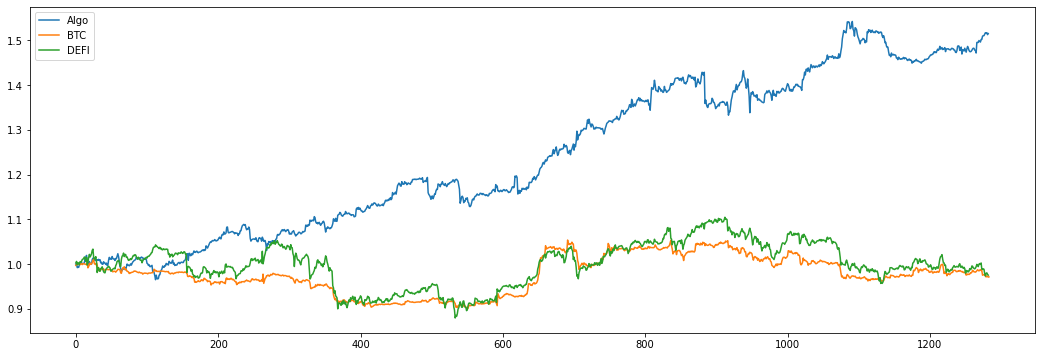

In [45]:
plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
plt.plot(btc_cumret, label='BTC')
plt.plot(defi_cumret, label='DEFI')
plt.legend()

In [52]:
# fraction of returns to pay transaction costs for
tc_frac = abs(algo_pos.shift().diff()).sum(axis=1)/abs(algo_pos.shift()).sum(axis=1)
# assume two-way transaction cost of 0.06% (BNB discount)
ret_tc = ret - 0.0003*2*tc_frac # multiply by 2 since we use 2x capital
cumret_tc = np.nancumprod(1+ret_tc)

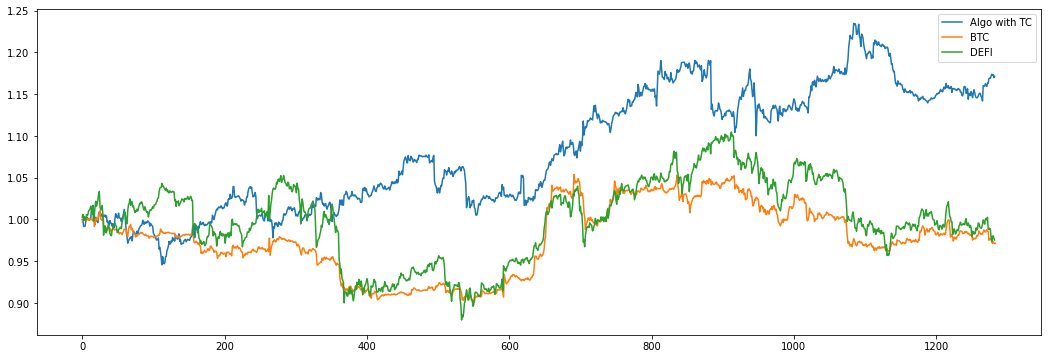

In [53]:
plt.figure(figsize=(18,6))
plt.plot(cumret_tc, label='Algo with TC')
plt.plot(btc_cumret, label='BTC')
plt.plot(defi_cumret, label='DEFI')
plt.legend()

In [55]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(17520/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(17520) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD


results = pd.DataFrame(index=['BTC', 'DEFI', 'Algo', 'Algo_with_tc'], columns=['total_return', 'apr', 'Sharpe', 
                                                                       'maxDD', 'maxDDD'])
results.loc['BTC'] = calculate_metrics(btc_cumret)
results.loc['DEFI'] = calculate_metrics(defi_cumret)
results.loc['Algo'] = calculate_metrics(cumret)
results.loc['Algo_with_tc'] = calculate_metrics(cumret_tc)
results

,total_return,apr,Sharpe,maxDD,maxDDD
BTC,-0.025695,-0.298963,-0.556002,-0.108306,627.0
DEFI,-0.027403,-0.315749,-0.140435,-0.164217,502.0
Algo,0.514899,289.554921,9.386835,-0.067128,191.0
Algo_with_tc,0.171316,7.665173,3.766588,-0.077015,198.0
